In [149]:
import random
import numpy as np
import pandas as pd
import time
import re
import datetime
import os
import matplotlib.pyplot as plt

In [150]:
dfDict = dict()
for file in os.listdir('outletSpecificData/upToDateData/'):
    if file[0] != '.':
        df = pd.read_excel(f'outletSpecificData/upToDateData/{file}', index_col=0)  
        try:
            df['dateSeen'] = pd.to_datetime(df['dateSeen'], unit='s', utc=True).dt.tz_convert('America/New_York')
            dfDict[file] = df
        except:
            print(file)

rt.com_07-12-2022.xlsx


In [151]:
dfDict.keys()

dict_keys(['foxnews.com_07-12-2022.xlsx', 'aljazeera.com_07-11-2022.xlsx', 'sputniknews.com_07-12-2022.xlsx', 'cnn.com_07-12-2022.xlsx', 'plenglish.com_07-12-2022.xlsx', 'english.pravda.ru_07-12-2022.xlsx', 'tass.com_07-13-2022.xlsx', 'punchng.com_07-12-2022.xlsx', 'en.people.cn_07-11-2022.xlsx', 'bbc.co.uk_07-12-2022.xlsx'])

In [152]:
random.choice(dfDict['tass.com_07-13-2022.xlsx']['text'])

'MOSCOW, January 12. /TASS/. Russian Foreign Minister Sergey Lavrov discussed the Geneva and Brussels meetings on guarantees of security during a phone call with his Greek counterpart Nikos Dendias on Wednesday, the Russian Foreign Ministry said in a statement. "The sides reviewed the perspectives of cooperation between the Foreign Ministries of Russia and Greece, as well as international and regional issues. The focus was on the meetings in Geneva and Brussels on the guarantees of security in Europe. The Russian side provided a detailed assessment of the situation in Ukraine, and the ways to normalize it based on the unconditional implementation of the Minsk Package of Measures," the Russian Foreign Ministry said. According to the Russian Foreign Ministry, the sides discussed the topical issues of the bilateral agenda as a follow up to the December 8, 2021,\xa0talks between Russian President Vladimir Putin and Prime Minister of Greece Kyriakos Mitsotakis in Sochi, as well as the Decem

In [154]:
for outlet in dfDict:
    records = dfDict[outlet].to_dict('records')
    char_total = 0
    word_total_estimate = 0
    for rec in records:
        if type(rec['text']) == str:
            char_total += len(rec['text'])
            word_total_estimate += len(rec['text'].split(' '))
    print(f'{outlet}: {"{:,}".format(len(records))} total records.')
    print(f'\tThere are {"{:,}".format(char_total)} total characters from {outlet}.')
    print(f'\tThere are {"{:,}".format(word_total_estimate)} estimated total words from {outlet}.')
    print()

foxnews.com_07-12-2022.xlsx: 1,470 total records.
	There are 5,911,626 total characters from foxnews.com_07-12-2022.xlsx.
	There are 983,574 estimated total words from foxnews.com_07-12-2022.xlsx.

aljazeera.com_07-11-2022.xlsx: 1,350 total records.
	There are 8,167,096 total characters from aljazeera.com_07-11-2022.xlsx.
	There are 1,320,501 estimated total words from aljazeera.com_07-11-2022.xlsx.

sputniknews.com_07-12-2022.xlsx: 1,397 total records.
	There are 4,204,072 total characters from sputniknews.com_07-12-2022.xlsx.
	There are 665,883 estimated total words from sputniknews.com_07-12-2022.xlsx.

cnn.com_07-12-2022.xlsx: 1,097 total records.
	There are 4,748,990 total characters from cnn.com_07-12-2022.xlsx.
	There are 778,818 estimated total words from cnn.com_07-12-2022.xlsx.

plenglish.com_07-12-2022.xlsx: 865 total records.
	There are 1,343,279 total characters from plenglish.com_07-12-2022.xlsx.
	There are 211,040 estimated total words from plenglish.com_07-12-2022.xlsx.

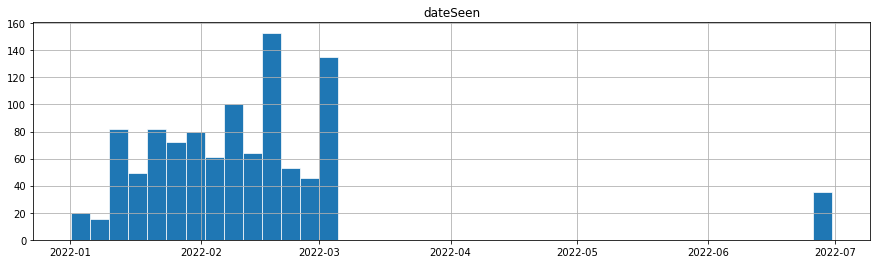

In [147]:
fig = plt.figure(figsize = (15,4))
ax = fig.gca()
hist = dfDict['tass.com_07-13-2022.xlsx'].hist(column='dateSeen', bins=40,edgecolor='white',linewidth=.7,ax=ax)

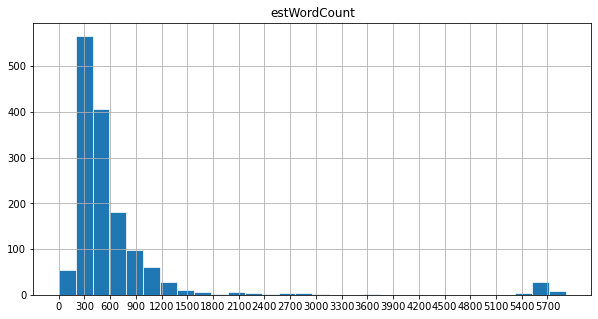

In [128]:
# Count words
def getWordCount(text):
    if type(text) == str:
        return len(text.split(' '))
    else:
        return 0

df = dfDict['foxnews.com_07-12-2022.xlsx']
df['estWordCount'] = df['text'].apply(getWordCount)

fig = plt.figure(figsize = (10,5))
ax = fig.gca()
ax.xaxis.set_ticks(list(range(0,6000,300)))  
hist = df.hist(column='estWordCount',bins=30,ax=ax,edgecolor='white',linewidth=.7)